<a href="https://colab.research.google.com/github/Dietrich061991/Analise-estatistica-blackfriday/blob/master/Predicting_Nationality_of_Individuals_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
  


In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/Python-Machine-Learning/Python-Machine-Learning/nacionality"


 Names_Dataset.csv
 nationality_logit_model.pkl
 nationality_nv_model.pkl
'Predicting Nationality of Individuals Using their Names with ML.ipynb'


In [0]:
df = pd.read_csv("/content/drive/My Drive/Python-Machine-Learning/Python-Machine-Learning/nacionality/Names_Dataset.csv")
df.head(5)


,Unnamed: 0,names,nationality
0,0,Gershon,yiddish
1,1,Lantz,yiddish
2,2,Zaide,yiddish
3,3,Zalman,yiddish
4,4,Zindel,yiddish


In [0]:
df.shape

(3238, 3)

In [0]:
df.columns

Index(['Unnamed: 0', 'names', 'nationality'], dtype='object')

In [0]:
 df['nationality'].unique()


array(['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
       'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
       'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
       'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
       'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
       'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
       'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
       'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
       'danish', 'hindi', 'old-german', 'turkish', 'indian',
       'czechoslovakian'], dtype=object)

In [0]:
 df['nationality'].value_counts()


french              100
chinese             100
japanese            100
german              100
old-english         100
african-american    100
latin               100
african             100
hebrew              100
arabic              100
hindi               100
scandinavian        100
spanish             100
english             100
italian             100
american            100
native-american     100
hawaiian            100
irish               100
greek               100
welsh                91
gaelic               87
russian              85
slavic               79
scottish             74
hungarian            64
celtic               62
persian              55
turkish              52
vietnamese           52
polish               48
old-french           46
middle-english       45
norse                40
old-german           40
czechoslovakian      38
teutonic             32
egyptian             30
old-norse            28
sanskrit             28
indian               25
dutch           

In [0]:
names = ['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
       'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
       'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
       'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
       'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
       'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
       'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
       'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
       'danish', 'hindi', 'old-german', 'turkish', 'indian',
       'czechoslovakian']

In [0]:
len(names)

50

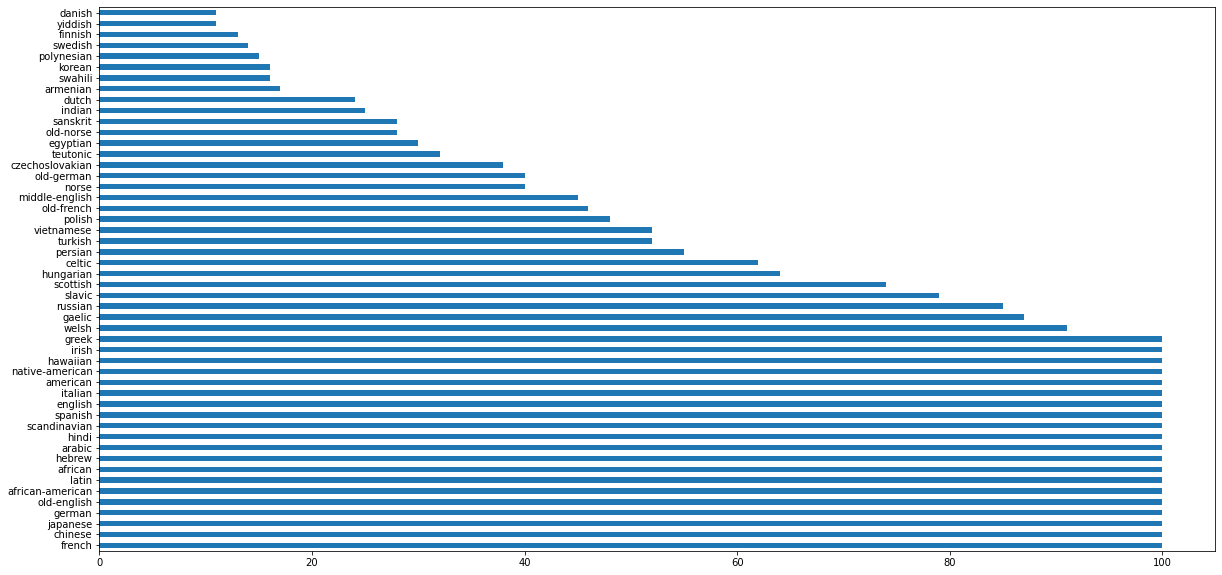

In [0]:
df['nationality'].value_counts().plot(kind='barh',figsize =(20,10))


In [0]:
# features 
xfeatures = df['names']
ylabels = df['nationality']

In [0]:
# vectorrize features
cv = CountVectorizer()
x = cv.fit_transform(xfeatures)

In [0]:
cv.get_feature_names()

['aaliyah',
 'aari',
 'aaron',
 'aase',
 'aba',
 'aban',
 'abbas',
 'abbellonna',
 'abbott',
 'abby',
 'abdiel',
 'abdulaziz',
 'abel',
 'abelard',
 'abeni',
 'abeque',
 'abey',
 'abeytu',
 'abhay',
 'abhijit',
 'abhorson',
 'abia',
 'abiba',
 'abie',
 'abigail',
 'abijah',
 'abira',
 'abital',
 'abmaba',
 'abner',
 'abra',
 'abraham',
 'abrahsa',
 'abriana',
 'abril',
 'absolom',
 'abtin',
 'abuna',
 'acacio',
 'acantha',
 'ace',
 'achachak',
 'achazia',
 'achilles',
 'achuta',
 'ackley',
 'acton',
 'acura',
 'ada',
 'adahy',
 'adalai',
 'adalbert',
 'adalgisa',
 'adalgiso',
 'adalia',
 'adam',
 'adamina',
 'adan',
 'adar',
 'adara',
 'adare',
 'addai',
 'addison',
 'adelaide',
 'adelbert',
 'adelfried',
 'adelino',
 'adelmio',
 'adelmo',
 'adelpha',
 'ademaro',
 'adena',
 'adeodatus',
 'aderes',
 'adger',
 'adham',
 'adia',
 'adie',
 'adin',
 'aditya',
 'adler',
 'adley',
 'admon',
 'adney',
 'adoette',
 'adolfina',
 'adolph',
 'adon',
 'adonis',
 'adora',
 'adrian',
 'adrienne',
 'a

In [0]:
# split Dataset into train/test
x_train,x_test,y_train,y_test = train_test_split(x, ylabels,test_size = 0.33,random_state=42)

**Naive_bayes**

In [0]:
#Buil Model
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Accuracy of our model
nv.score(x_test,y_test)

0.05986903648269411

**TEST MODEL**

**Exemple** **1**

In [0]:
sample1 = ['kofi']
vect1 = cv.transform(sample1).toarray()
nv.predict(vect1)

array(['african'], dtype='<U16')

**Exemple 2**

In [0]:
sample2 = ['Dietrich','Tamer','Li']
vect2 = cv.transform(sample2).toarray()
nv.predict(vect2)

array(['german', 'french', 'chinese'], dtype='<U16')

**Logistic Regression**

In [0]:
#Logistic Regression
logisticR = LogisticRegression()
logisticR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Accuracy for our model
logisticR.score(x_test,y_test)

0.0626753975678204

**TEST MODEL**

**Exemple1**

In [0]:
sample1 = ['kofi']
vect1 = cv.transform(sample1).toarray()
logisticR.predict(vect1)

array(['african'], dtype=object)

**Exemplo2**

In [0]:
sample2 = ['Dietrich','Tamer','Li']
vect2 = cv.transform(sample2).toarray()
nv.predict(vect2)

array(['german', 'french', 'chinese'], dtype='<U16')

**Interpretaion of model**

In [0]:
!pip install eli5
import eli5

In [0]:
# show the weights
eli5.show_weights(logisticR,target_names = names)

In [0]:
feature_names = cv.get_feature_names ()

In [0]:
eli5.show_weights(logisticR,feature_names = feature_names ,target_names = names)

In [0]:
# save model
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
nacionality_nv_model = open('nacionality_nv_model.pk1','wb')
joblib.dump(nv,nacionality_nv_model)
nacionality_nv_model.close()

In [0]:
nacionality_logisticR_model = open('nacionality_logisticR_model.pk1','wb')
joblib.dump(logisticR,nacionality_logisticR_model)
nacionality_logisticR_model.close()